In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split

<h1 style = 'color: Orange'>Ridge Regression</h1>

,alpha,error
4,1.000,3.071007
3,0.500,3.072121
5,1.500,3.073661
6,2.000,3.077510
7,2.500,3.082563
2,0.100,3.100479
1,0.010,3.115621
0,0.001,3.117373


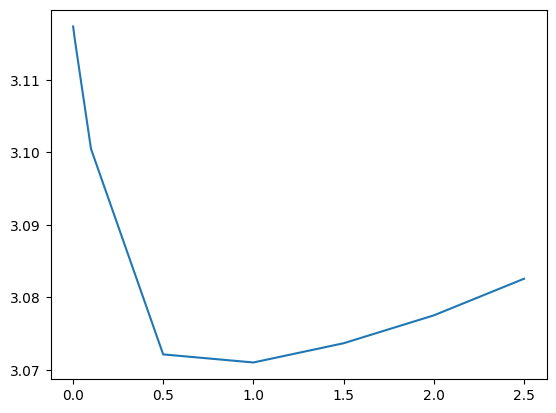

In [24]:
boston = pd.read_csv('../Datasets/Boston.csv')
X = boston.drop('medv', axis=1)
y = boston['medv']
scores = []
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=25)

alphas = [0.001,0.01,0.1,0.5,1,1.5,2,2.5]
for a in alphas:
    ridge = Ridge(alpha = a)
    ridge.fit(X_train,y_train)
    y_pred = ridge.predict(X_test)
    scores.append([a,mean_absolute_error(y_pred,y_test)])
df = pd.DataFrame(scores,columns=['alpha','error'])


plt.plot(df['alpha'],df['error'])
df.sort_values('error')


<h1 style = 'color: Orange'>Lasso Regression</h1>

,alpha,error
1,0.010,3.088221
0,0.001,3.114200
2,0.100,3.129219
3,0.500,3.197794
4,1.000,3.373066
5,1.500,3.542921
6,2.000,3.573108
7,2.500,3.632183


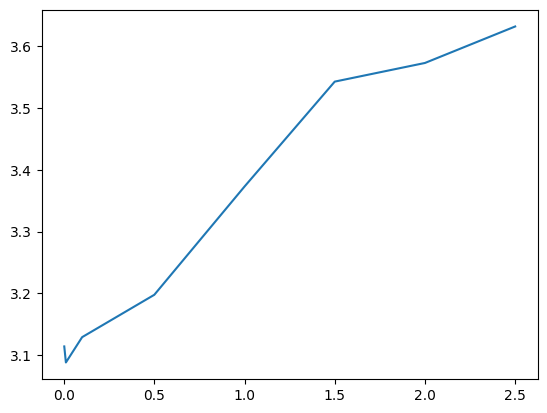

In [26]:
boston = pd.read_csv('../Datasets/Boston.csv')
X = boston.drop('medv', axis=1)
y = boston['medv']
scores = []
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=25)

alphas = [0.001,0.01,0.1,0.5,1,1.5,2,2.5]
for a in alphas:
    lasso = Lasso(alpha = a)
    lasso.fit(X_train,y_train)
    y_pred = lasso.predict(X_test)
    scores.append([a,mean_absolute_error(y_pred,y_test)])
df = pd.DataFrame(scores,columns=['alpha','error'])

plt.plot(df['alpha'],df['error'])
df.sort_values('error')

<h1 style = 'color: Orange'>Elastic net Regression</h1>

In [33]:
X = boston.drop('medv', axis=1)
y = boston['medv']
scores = []
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=25)

alphas = [0.001,0.01,0.1,0.5,1,1.5,2,2.5]
ratios = [0.001,0.025,0.5,0.75,1]
scores = []
for a in alphas:
    for r in ratios:
        elastic = ElasticNet(alpha = a,l1_ratio = r)
        elastic.fit(X_train,y_train)
        y_pred = elastic.predict(X_test)
        scores.append([a,r,mean_absolute_error(y_test,y_pred)])

df = pd.DataFrame(scores,columns=['alpha','l1_ratio','error'])

df.sort_values('error')

,alpha,l1_ratio,error
8,0.010,0.750,3.071908
0,0.001,0.001,3.077351
1,0.001,0.025,3.077802
7,0.010,0.500,3.079164
9,0.010,1.000,3.088221
2,0.001,0.500,3.089473
6,0.010,0.025,3.091700
5,0.010,0.001,3.092238
3,0.001,0.750,3.100139
4,0.001,1.000,3.114200
